<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-5-7pm/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

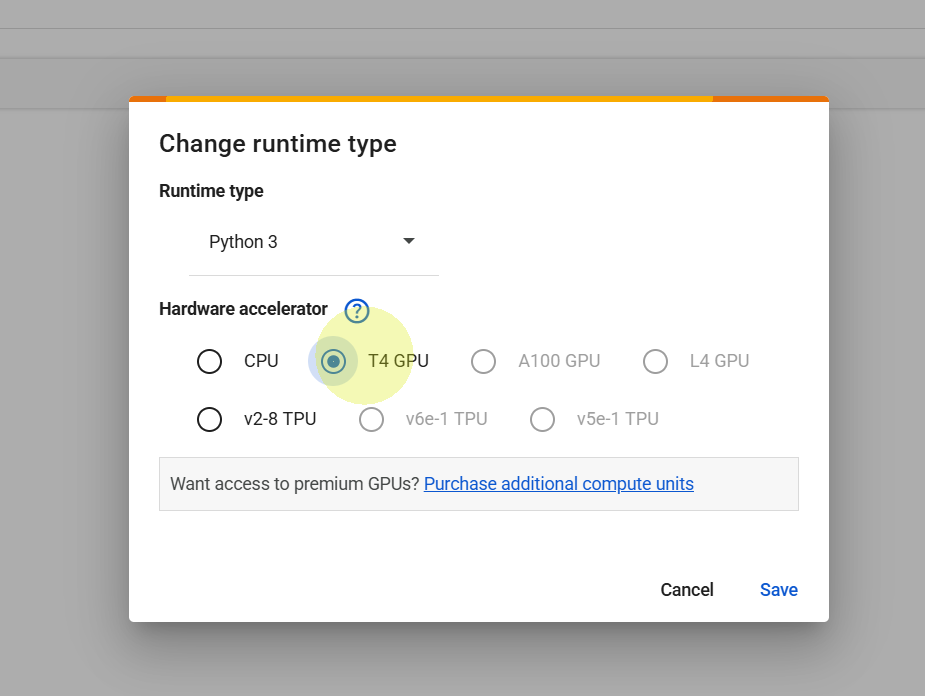

## Connect to GPU runtime before starting with coding

# Regression scenarios with Keras

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


  AT - Atmospheric Tempreature degree celsius
  V - Vaccum Pressure Pa
  AP - Atmospheric Pressure Pa
  RH - Relative Humidity %
  PE - Energy output of plant in Mega Watts
  PE is Target feature which is numeric in nature


## Perform basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# check for missing values
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
#check for duplicated data
df.duplicated().sum()

np.int64(41)

In [ ]:
# drop the duplicated
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features
Y : PE

In [ ]:
X = df.drop(columns=['PE'])
Y = df[["PE"]]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Create data pipelines for data cleaning and data preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


## Perform train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)

In [ ]:
xtrain.head()

,AT,V,AP,RH
9077,0.031136,-0.740477,-0.861431,-0.413162
7398,1.528985,1.104917,-0.454038,-2.094577
3823,0.858647,0.873947,-0.640900,-1.453777
9439,0.602065,0.455364,0.559393,-1.044377
4499,0.553704,0.471129,0.805176,0.323484


In [ ]:
xtest.head()

,AT,V,AP,RH
4903,0.340109,0.683180,1.061059,-0.367977
2944,0.023076,0.405701,-0.043279,1.225807
1771,-0.354409,-0.744418,0.192403,-0.730823
1450,-0.586811,-1.020320,-1.164450,0.631561
5399,-0.310078,-1.148812,-1.723353,-0.596639


In [ ]:
ytrain.head()

,PE
9077,453.09
7398,441.56
3823,449.82
9439,440.17
4499,441.56


In [ ]:
ytest.head()

,PE
4903,453.03
2944,446.15
1771,459.98
1450,466.27
5399,459.83


## Model Building with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [ ]:
df.shape

(9527, 5)

In [ ]:
xtrain.shape

(7145, 4)

In [ ]:
xtrain.shape[1]

4

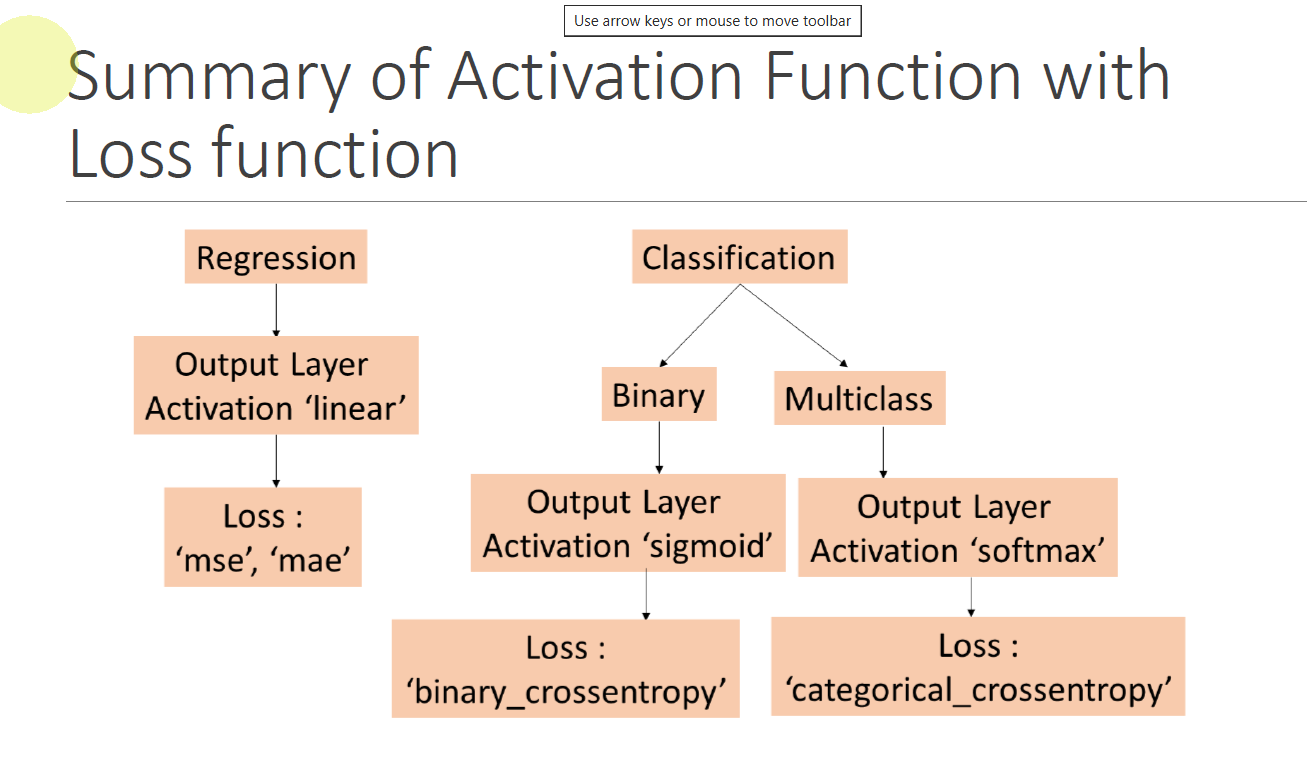

In [ ]:
# Initialize the sequential model
model = Sequential()

# Add the input layer by providing features as inputs
model.add(Input(shape=(xtrain.shape[1],)))

# Add the hidden layers
model.add(Dense(units=8,activation='relu'))

# Add the second hidden layer
model.add(Dense(units=4,activation='relu'))

# Add the output layer
model.add(Dense(units=1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [ ]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 206817.0156 - mae: 454.4579 - val_loss: 205028.5000 - val_mae: 452.4608
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 202424.0000 - mae: 449.5413 - val_loss: 195012.8750 - val_mae: 441.0499
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 188695.2656 - mae: 433.6360 - val_loss: 170334.8750 - val_mae: 411.3341
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 159834.7812 - mae: 397.6972 - val_loss: 131525.1250 - val_mae: 358.7757
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 120618.8203 - mae: 341.7115 - val_loss: 87605.4297 - val_mae: 285.8359
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76126.2969 - mae: 262.1639 - val_loss: 51733.7930 - val_mae: 209.0895
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45391.3867 - mae: 192.2183 - val_loss: 30544.3047 - val_mae: 152.8297
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28308.9688 - 

## Evaluate the model in training and testing

In [ ]:
model.evaluate(xtrain,ytrain)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.1093 - mae: 3.6623


[20.73359489440918, 3.5877976417541504]

In [ ]:
model.evaluate(xtest,ytest)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4976 - mae: 3.5303


[19.8426456451416, 3.5229647159576416]

## Learning Curve

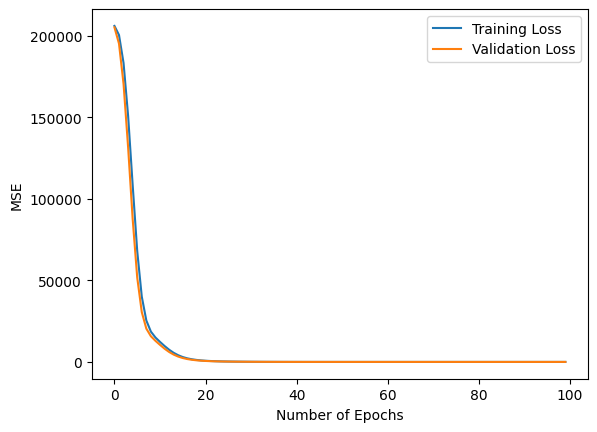

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Evaluate the model on basis of regression metrics

In [ ]:
ypred_test = model.predict(xtest)
ypred_test

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[448.13614],
       [450.02863],
       [462.58258],
       ...,
       [467.62964],
       [476.05103],
       [449.6399 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
def evaluate_model(model,x,y):
  ypred = model.predict(x)
  mse = mean_squared_error(y,ypred)
  mae = mean_absolute_error(y,ypred)
  r2 = r2_score(y,ypred)

  print(f"MSE: {mse}")
  print(f"MAE:{mae}")
  print(f"R2_score: {r2}")

In [ ]:
evaluate_model(model,xtrain,ytrain)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE: 20.733600616455078
MAE:3.5877976417541504
R2_score: 0.9285417795181274


In [ ]:
evaluate_model(model,xtest,ytest)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 19.84264373779297
MAE:3.5229644775390625
R2_score: 0.9317526817321777


## Above model gives us the score of 93% which is a very good score.

## save the model
model.save('filename.keras')

In [ ]:
model.save('powerplant.keras')

## Load the model

In [ ]:
from keras.models import load_model

In [ ]:
m = load_model('/content/powerplant.keras')

In [ ]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [ ]:
m.predict(xtest)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[448.13614],
       [450.02863],
       [462.58258],
       ...,
       [467.62964],
       [476.05103],
       [449.6399 ]], dtype=float32)